ESSENTIALS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


COST_SAF = 2350
COST_CJF = 750
EMISSIONS_CJF = 3.16
EMISSIONS_SAF = EMISSIONS_CJF *0.2
STARTING_YEAR = 2025
SCC_GROWTH_RATE = 0.02
FUEL_TO_TICKET = 0.3
WTP_PERC = 0.1


SCENARIOS = {
    'US Scenario ($51)': 51,
    'Rennert Scenario ($185)': 185,
    'EU Scenario ($290)': 290
}

def break_even_year(scc_initial, wtp_perc=WTP_PERC, growth_rate=SCC_GROWTH_RATE,fuel_perc = FUEL_TO_TICKET,  years=150):
      wtp = COST_CJF / fuel_perc * wtp_perc
      for year in range(years):
        current_year = STARTING_YEAR + year
        scc_t = scc_initial * (1 + growth_rate) ** year
        left_side = COST_SAF - wtp
        right_side = COST_CJF + (EMISSIONS_CJF - EMISSIONS_SAF) * scc_t

        if left_side <= right_side:
            return current_year


SCENARIO ANALYSIS

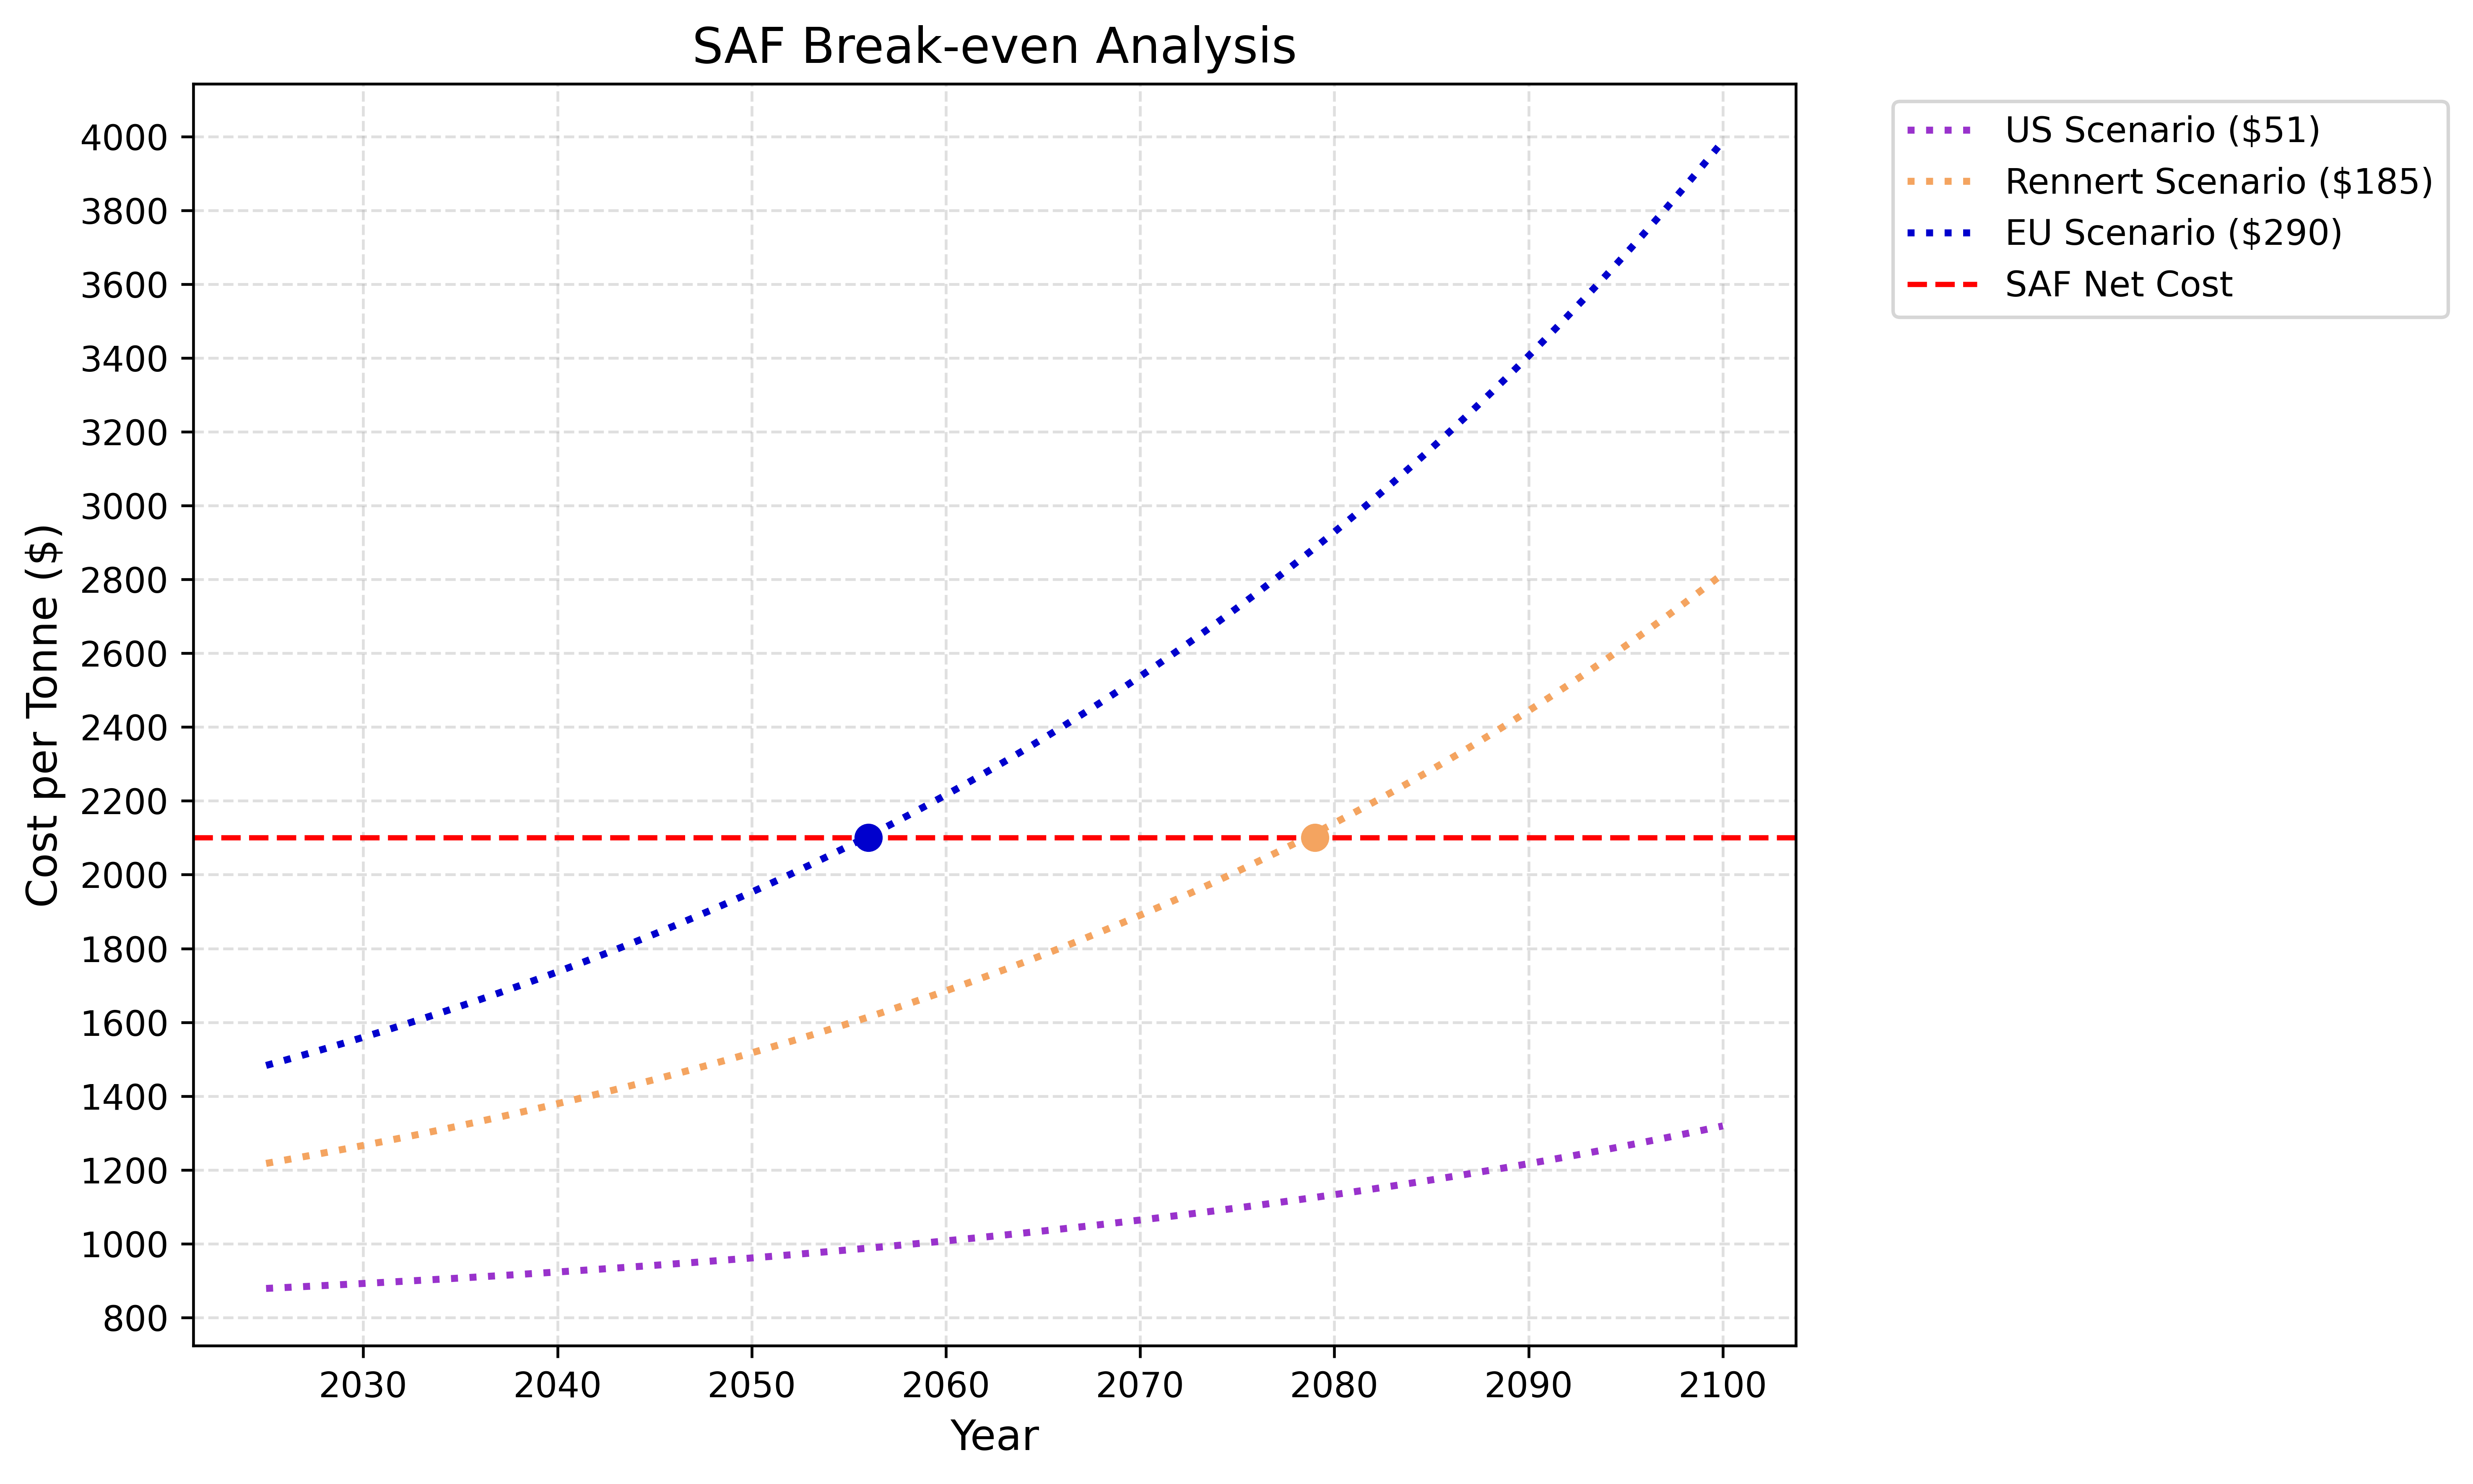

In [ ]:

def cost_curves(scc_initial, wtp_perc = WTP_PERC, growth_rate=SCC_GROWTH_RATE,fuel_perc = FUEL_TO_TICKET ,end_year=2100):
    wtp = COST_CJF / fuel_perc * wtp_perc
    years = np.arange(STARTING_YEAR, end_year + 1)
    scc_growth = scc_initial * (1 + growth_rate) ** (years - STARTING_YEAR)
    right_side = COST_CJF + (EMISSIONS_CJF - EMISSIONS_SAF) * scc_growth
    left_side = COST_SAF - wtp

    return years, right_side, left_side


def plot_breakeven_scenarios():
    plt.figure(figsize=(10, 6), dpi=600) #change DPI for better resulution
    colors = ['darkorchid', 'sandybrown', 'mediumblue']

    for idx, (scenario_name, scc) in enumerate(SCENARIOS.items()):
        years, fossil_costs, saf_net_cost = cost_curves(scc)
        plt.plot(years, fossil_costs,
                 color=colors[idx],
                 linestyle=':',
                 linewidth=2,
                 label=scenario_name)
        cross_point = np.argmax(fossil_costs >= saf_net_cost)
        if cross_point > 0 and fossil_costs[cross_point] >= saf_net_cost:
            plt.scatter(years[cross_point], saf_net_cost,
                       color=colors[idx],
                       marker='o',
                       s=50,
                       zorder=5)
    plt.axhline(y=saf_net_cost,
                color='red',
                linestyle='--',
                linewidth=1.5,
                label='SAF Net Cost')

    plt.title("SAF Break-even Analysis", fontsize=14)
    plt.ylabel("Cost per Tonne ($)", fontsize=12)
    plt.xlabel("Year", fontsize=12)
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, nbins=20))

    plt.grid(True, linestyle='--', alpha=0.4)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()
    #plt.savefig('scenario_analysis.jpg', bbox_inches='tight', dpi=1200)
    plt.show()

plot_breakeven_scenarios()

In [ ]:
breakeven_years = [break_even_year(scc) for scc in SCENARIOS.values()]
print(breakeven_years)

[2144, 2079, 2056]


SCC Sensitivity

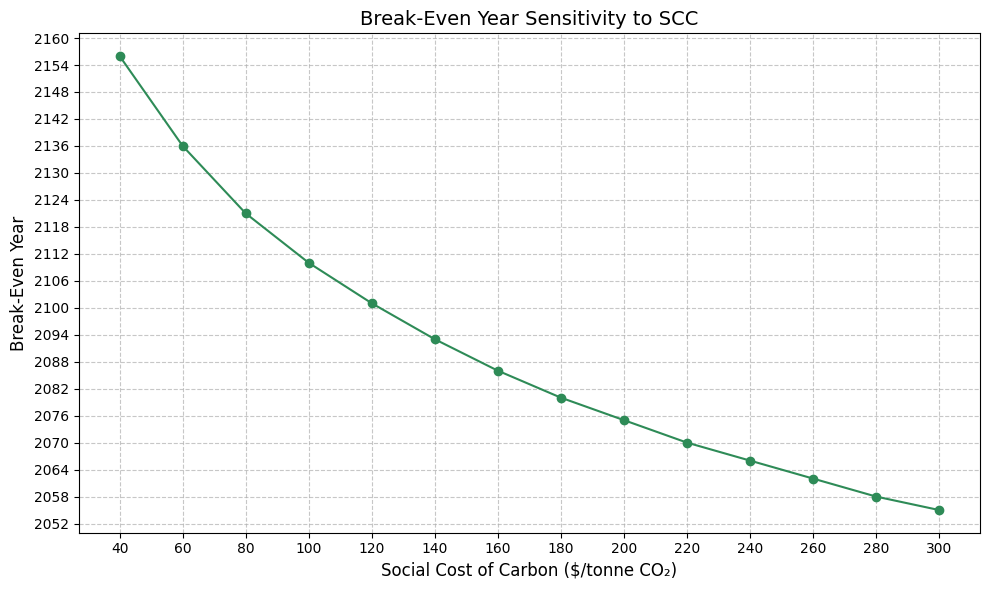

In [ ]:

def scc_sensitivity():
    scc_values = np.arange(40, 301, 20)
    break_even_years = [break_even_year(scc) for scc in scc_values]
    return  scc_values, break_even_years

def plot_scc_sensitivity():
    scc_values, break_even_years = scc_sensitivity()

    plt.figure(figsize=(10, 6))
    plt.plot(scc_values, break_even_years,
             color='seagreen',
             marker='o',
             linestyle='-',
             markersize=6)

    plt.title("Break-Even Year Sensitivity to SCC", fontsize=14)
    plt.xlabel('Social Cost of Carbon ($/tonne CO₂)', fontsize=12)
    plt.ylabel('Break-Even Year', fontsize=12)
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, nbins=20))

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.xticks(np.arange(40, 301, 20))
    plt.tight_layout()
    #plt.savefig('scc_sensitivity.jpg', bbox_inches='tight', dpi=1200)
    plt.show()

plot_scc_sensitivity()

In [ ]:
val = scc_sensitivity()[1]
len(val)

14

WTP SENSITIVITY

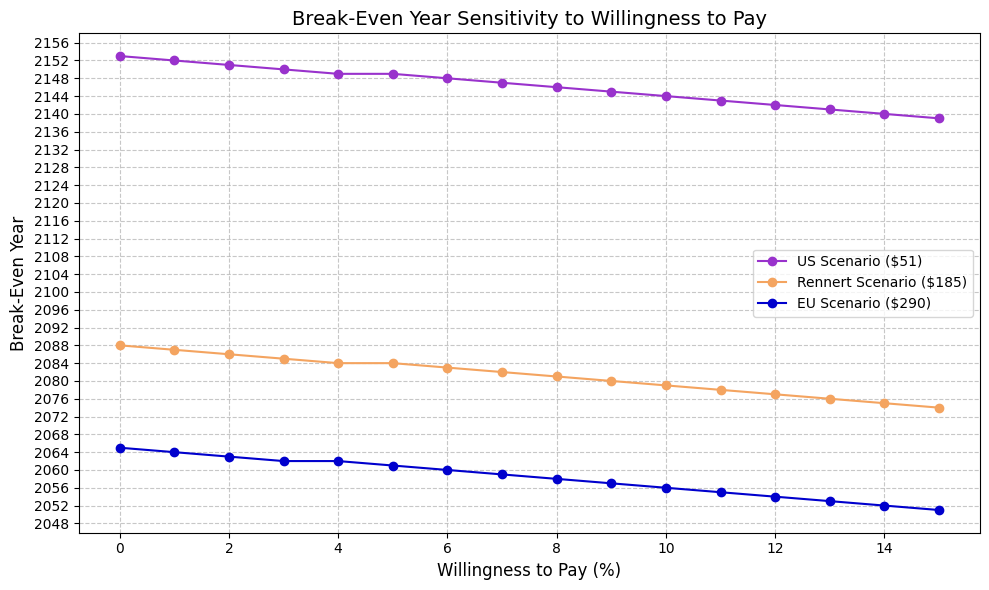

In [ ]:
def wtp_sensitivity():
    wtp_percents = np.arange(0, 0.16, 0.01)
    break_even_wtp = {}

    for scenario_name, scc in SCENARIOS.items():
        break_even_wtp[scenario_name] = [break_even_year(scc, wtp) for wtp in wtp_percents]

    return wtp_percents, break_even_wtp

def plot_wtp_sensitivity():

    wtp_percents, break_even_wtp = wtp_sensitivity()

    plt.figure(figsize=(10, 6))

    colors = ['darkorchid', 'sandybrown', 'mediumblue']

    for idx, (scenario_name, years) in enumerate(break_even_wtp.items()):
        plt.plot(wtp_percents * 100, years,
                 color=colors[idx],
                 marker='o',
                 linestyle='-',
                 markersize=6,
                 label=scenario_name)

    plt.title("Break-Even Year Sensitivity to Willingness to Pay", fontsize=14)
    plt.xlabel('Willingness to Pay (%)', fontsize=12)
    plt.ylabel('Break-Even Year', fontsize=12)
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, nbins=30))

    plt.legend(fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    #plt.savefig('wtp_sensitivity.jpg', bbox_inches='tight', dpi=1200)
    plt.show()

plot_wtp_sensitivity()

In [ ]:
us_case = wtp_sensitivity()[1]['US Scenario ($51)']
rennert_case = wtp_sensitivity()[1]['Rennert Scenario ($185)']
eu_case = wtp_sensitivity()[1]['EU Scenario ($290)']
print(max(us_case)-min(us_case),us_case)
print(max(rennert_case)-min(rennert_case),rennert_case)
print(max(eu_case)-min(eu_case),eu_case)


14 [2153, 2152, 2151, 2150, 2149, 2149, 2148, 2147, 2146, 2145, 2144, 2143, 2142, 2141, 2140, 2139]
14 [2088, 2087, 2086, 2085, 2084, 2084, 2083, 2082, 2081, 2080, 2079, 2078, 2077, 2076, 2075, 2074]
14 [2065, 2064, 2063, 2062, 2062, 2061, 2060, 2059, 2058, 2057, 2056, 2055, 2054, 2053, 2052, 2051]


SCC GROWTH-RATE SENSITIVITY

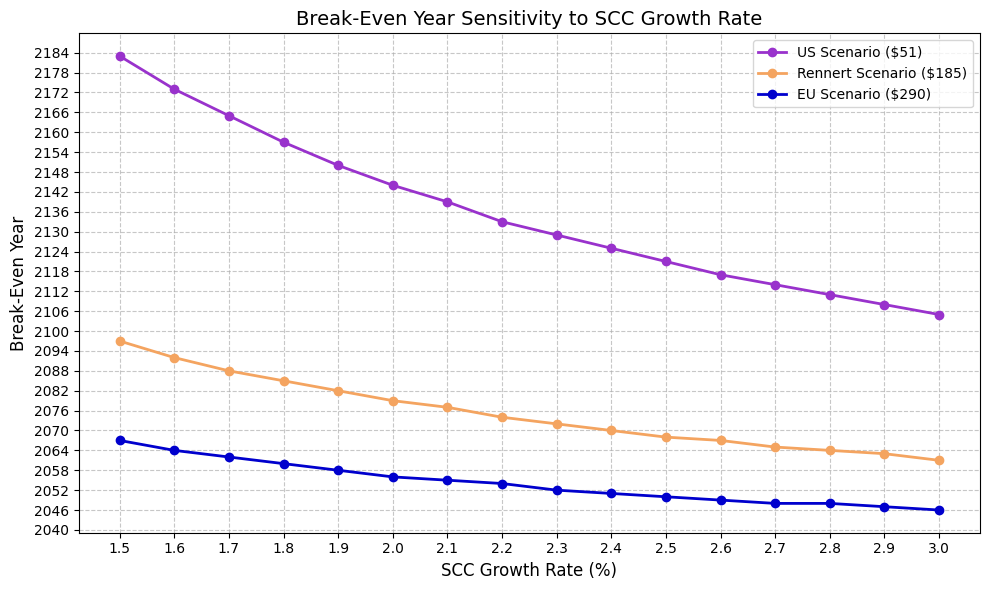

In [ ]:
def growth_rate_sensitivity():
    growth_rates = np.arange(0.015, 0.031, 0.001)
    break_even_growth = {}

    for scenario_name, scc in SCENARIOS.items():
        break_even_years = []
        for gr in growth_rates:
            be_year = break_even_year(scc, growth_rate=gr,years=165)
            break_even_years.append(be_year)

        break_even_growth[scenario_name] = break_even_years

    return growth_rates, break_even_growth

def plot_growth_rate_sensitivity():
    growth_rates, results = growth_rate_sensitivity()
    plt.figure(figsize=(10, 6))

    colors = ['darkorchid', 'sandybrown', 'mediumblue']

    for idx, (scenario_name, years) in enumerate(results.items()):
        plt.plot(growth_rates * 100,
                 years,
                 color=colors[idx],
                 marker='o',
                 linestyle='-',
                 linewidth=2,
                 markersize=6,
                 label=scenario_name)

    plt.title("Break-Even Year Sensitivity to SCC Growth Rate", fontsize=14)
    plt.xlabel('SCC Growth Rate (%)', fontsize=12)
    plt.ylabel('Break-Even Year', fontsize=12)
    plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, nbins=30))
    plt.xticks(np.arange(1.5, 3.1, 0.1))
    plt.legend(fontsize=10, loc='upper right')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    #plt.savefig('growth_rate_sensitivity_final.jpg', bbox_inches='tight', dpi=1200)
    plt.show()

plot_growth_rate_sensitivity()

In [ ]:
us_gr_case = growth_rate_sensitivity()[1]['US Scenario ($51)']
rennert_gr_case = growth_rate_sensitivity()[1]['Rennert Scenario ($185)']
eu_gr_case = growth_rate_sensitivity()[1]['EU Scenario ($290)']
print(max(us_gr_case)-min(us_gr_case),us_gr_case)
print(max(rennert_gr_case)-min(rennert_gr_case),rennert_gr_case)
print(max(eu_gr_case)-min(eu_gr_case),eu_gr_case)


78 [2183, 2173, 2165, 2157, 2150, 2144, 2139, 2133, 2129, 2125, 2121, 2117, 2114, 2111, 2108, 2105]
36 [2097, 2092, 2088, 2085, 2082, 2079, 2077, 2074, 2072, 2070, 2068, 2067, 2065, 2064, 2063, 2061]
21 [2067, 2064, 2062, 2060, 2058, 2056, 2055, 2054, 2052, 2051, 2050, 2049, 2048, 2048, 2047, 2046]
